# Add/import required packages

In [16]:
using Pkg
#Pkg.add(url="https://github.com/giordamaug/WiSARDj")
Pkg.add("MLJ")
Pkg.add("MLJBase")
Pkg.add("DataFrames")
Pkg.add("MLBase")
Pkg.add("RDatasets")
Pkg.add("Plots")
Pkg.add("Metrics")
using RDatasets, MLJ, MLJBase, MLBase, DataFrames, Metrics, Plots

   Resolving package versions...


  No Changes to `~/WiSARDj/Project.toml`
  No Changes to `~/WiSARDj/Manifest.toml`


   Resolving package versions...


  No Changes to `~/WiSARDj/Project.toml`
  No Changes to `~/WiSARDj/Manifest.toml`


   Resolving package versions...


  No Changes to `~/WiSARDj/Project.toml`
  No Changes to `~/WiSARDj/Manifest.toml`


   Resolving package versions...


  No Changes to `~/WiSARDj/Project.toml`
  No Changes to `~/WiSARDj/Manifest.toml`


   Resolving package versions...


  No Changes to `~/WiSARDj/Project.toml`
  No Changes to `~/WiSARDj/Manifest.toml`


   Resolving package versions...


  No Changes to `~/WiSARDj/Project.toml`
  No Changes to `~/WiSARDj/Manifest.toml`


   Resolving package versions...


    Updating `~/WiSARDj/Project.toml`
  [cb9f3049] + Metrics v0.1.2
    Updating `~/WiSARDj/Manifest.toml`
  [cb9f3049] + Metrics v0.1.2


Precompiling project...


  ✓ Metrics


  ✓ WiSARDj
2 dependencies successfully precompiled in 8 seconds (201 already precompiled)


# Load the "iris" dataset

In [7]:
iris = RDatasets.dataset("datasets", "iris");
first(iris, 3) |> pretty

┌─────────────┬────────────┬─────────────┬────────────┬─────────────────────────────────┐
│ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species                         │
│ Float64     │ Float64    │ Float64     │ Float64    │ CategoricalValue{String, UInt8} │
│ Continuous  │ Continuous │ Continuous  │ Continuous │ Multiclass{3}                   │
├─────────────┼────────────┼─────────────┼────────────┼─────────────────────────────────┤
│ 5.1         │ 3.5        │ 1.4         │ 0.2        │ setosa                          │
│ 4.9         │ 3.0        │ 1.4         │ 0.2        │ setosa                          │
│ 4.7         │ 3.2        │ 1.3         │ 0.2        │ setosa                          │
└─────────────┴────────────┴─────────────┴────────────┴─────────────────────────────────┘


# Classification with WiSARDj

In [9]:
using WiSARDj.MLJInterface: WiSARDClassifier

X = Matrix(DataFrames.select(iris, Not([:Species])))
y = vec(Matrix(DataFrames.select(iris, [:Species])))

model = WiSARDClassifier()
train, test = MLJ.partition(eachindex(y), 0.8, shuffle=true, rng=1)
MLJ.fit!(model, Any, X[train,:], y[train,:])
ŷ = MLJ.predict(model, Any, X[test,:])
y_targets = y[test,:]
accuracy = sum(ŷ .== y_targets) / length(y_targets)
println("accuracy: $accuracy")
MLJBase.ConfusionMatrix()(ŷ, coerce(vec(y_targets), OrderedFactor))  # I don't know why we need to coerce! 

accuracy: 0.9


              ┌─────────────────────────────────────────┐
              │              Ground Truth               │
┌─────────────┼─────────────┬─────────────┬─────────────┤
│  Predicted  │   setosa    │  versicol…  │  virginica  │
├─────────────┼─────────────┼─────────────┼─────────────┤
│   setosa    │      8      │      0      │      0      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│  versicol…  │      0      │      9      │      1      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│  virginica  │      0      │      2      │     10      │
└─────────────┴─────────────┴─────────────┴─────────────┘


# Load the "boston" dataset

In [11]:
boston = RDatasets.dataset("MASS", "Boston");
first(boston, 3) |> pretty

┌────────────┬────────────┬────────────┬───────┬────────────┬────────────┬────────────┬────────────┬───────┬───────┬────────────┬────────────┬────────────┬────────────┐
│ Crim       │ Zn         │ Indus      │ Chas  │ NOx        │ Rm         │ Age        │ Dis        │ Rad   │ Tax   │ PTRatio    │ Black      │ LStat      │ MedV       │
│ Float64    │ Float64    │ Float64    │ Int64 │ Float64    │ Float64    │ Float64    │ Float64    │ Int64 │ Int64 │ Float64    │ Float64    │ Float64    │ Float64    │
│ Continuous │ Continuous │ Continuous │ Count │ Continuous │ Continuous │ Continuous │ Continuous │ Count │ Count │ Continuous │ Continuous │ Continuous │ Continuous │
├────────────┼────────────┼────────────┼───────┼────────────┼────────────┼────────────┼────────────┼───────┼───────┼────────────┼────────────┼────────────┼────────────┤
│ 0.00632    │ 18.0       │ 2.31       │ 0.0   │ 0.538      │ 6.575      │ 65.2       │ 4.09       │ 1.0   │ 296.0 │ 15.3       │ 396.9      │ 4.98       │

# Regression with WiSARDj

Mean absolute error: 2.1334415977938996
Mean Squared Error: 9.868300218020428
Coefficient of Determination: 0.8467289137058057


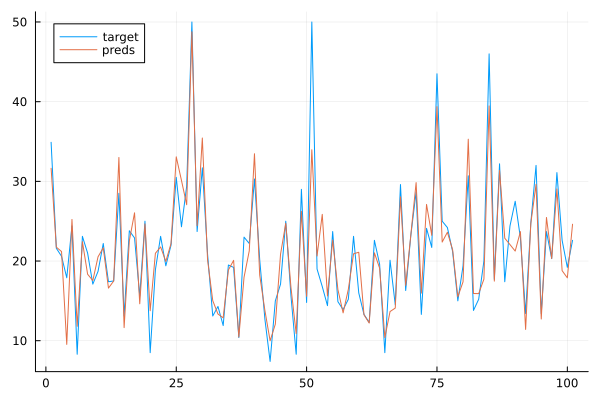

In [17]:
using WiSARDj.MLJInterface: WiSARDRegressor

model = WiSARDRegressor(n_bits=64, n_tics=1024)

X = Matrix(DataFrames.select(boston, Not([:MedV])))
y = vec(Matrix(DataFrames.select(boston, [:MedV])))
train, test = MLJ.partition(eachindex(y), 0.8, shuffle=true, rng=1)
MLJ.fit!(model, Any, X[train,:], y[train,:])
ŷ = MLJ.predict(model, Any, X[test,:])
y_targets = y[test,:]
MAE = Metrics.mae(vec(ŷ), y_targets)
MSE = Metrics.mse(vec(ŷ), y_targets)
R2 = Metrics.r2_score(vec(ŷ), y_targets)
println("Mean absolute error: $MAE")
println("Mean Squared Error: $MSE")
println("Coefficient of Determination: $R2")
plot(hcat(y_targets, vec(ŷ)), label=["target" "preds"])